# Bank Credit Card Churn Analysis (EDA)

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc.

- Fonte
Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### Outline

1. **Import the Dataset**
2. **Data Visualization and Cleaning**
3. **Exploratory Data Analysis (EDA)**
4. **Hypotheses for Card Cancellation**
5. **Conclusions**
6. **Suggestions to Reduce Cancellation Rate**

Is there anything specific you would like to delve into within this outline? 😊

# Importing the database, analyzing relevant information and handling missing/null data.

In [15]:
import pandas as pd
df = pd.read_csv("ClientesBanco.csv", encoding="latin1")
df = df.drop("CLIENTNUM", axis=1)

In [16]:
# Checking for null values
df.isnull().sum()

Categoria                        0
Idade                            0
Sexo                             0
Dependentes                      0
Educação                         0
Estado Civil                     0
Faixa Salarial Anual             0
Categoria Cartão                 1
Meses como Cliente               0
Produtos Contratados             0
Inatividade 12m                  0
Contatos 12m                     0
Limite                           0
Limite Consumido                 0
Limite Disponível                0
Mudanças Transacoes_Q4_Q1        0
Valor Transacoes 12m             0
Qtde Transacoes 12m              0
Mudança Qtde Transações_Q4_Q1    0
Taxa de Utilização Cartão        0
dtype: int64

In [17]:
# Deleting row whose value in the "Card Category" column is null
df = df.dropna()

In [18]:
# Exploring value distribution. Getting an overview of the dataset.
df.describe().round(2)

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00,10126.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.96,1162.76,7469.20,108.71,4404.39,64.86,66.58,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9089.23,815.01,9091.13,353.91,3397.16,23.47,284.00,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,358.00,1324.25,0.63,2156.00,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3473.00,0.74,3899.50,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.75,1784.00,9860.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3397.00,18484.00,139.00,3714.00,1.00


In [19]:
df.head()

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Cliente,45,M,3,Ensino Médio,Casado,Between $60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,Cliente,51,M,3,Ensino Superior,Casado,Between $80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,Cliente,40,M,3,Sem ensino formal,Casado,Between $60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


# Exploratory analysis among customers who canceled their card

## Comparison between active and canceled customers in each of the available columns (variables)
### Histogram plot for each column vs. category custumer status (cancelled customer - red, or active customer - blue)

In [20]:
# Ratio of canceled customers to total customers
qtde_categoria = df["Categoria"].value_counts(normalize=True)*100
display(qtde_categoria)

Categoria
Cliente      83.932451
Cancelado    16.067549
Name: proportion, dtype: float64

In [21]:
import plotly.express as px
graphic = px.histogram(df, x="Qtde Transacoes 12m", color="Categoria", title="Number of transactions in the last 12m X Costumer status")
graphic.update_layout(
    xaxis_title='Number of transactions in the last 12m', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

In [22]:
graphic = px.histogram(df, x="Valor Transacoes 12m", color="Categoria", title="Value of transactions in the last 12m X Costumer status")
graphic.update_layout(
    xaxis_title='Value of transactions in the last 12m', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

In [23]:
graphic = px.histogram(df, x="Produtos Contratados", color="Categoria", title="Quantity of products contracted X Costumer status")
graphic.update_layout(
    xaxis_title='Quantity of products contracted', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

In [24]:
graphic = px.histogram(df, x="Categoria Cartão", color="Categoria", title="Card category X Costumer status")
graphic.update_layout(
    xaxis_title='Card category', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

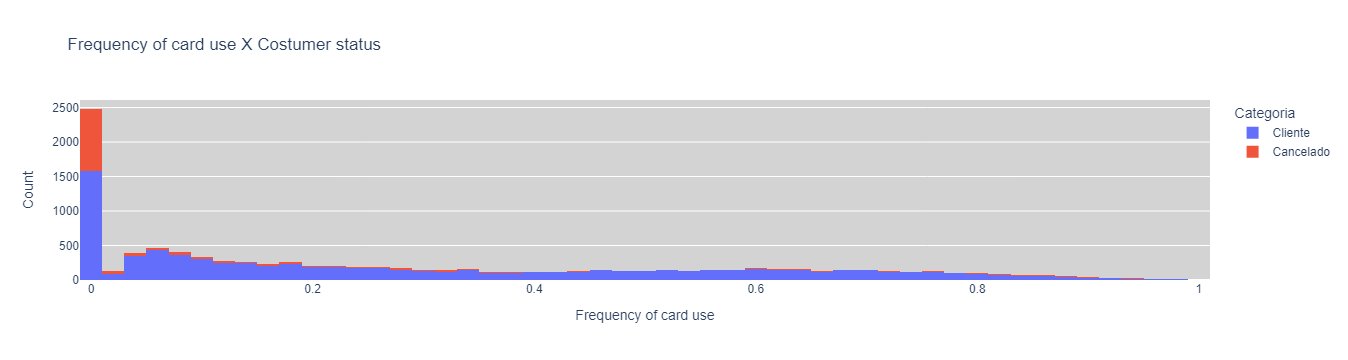

In [25]:
graphic = px.histogram(df, x="Taxa de Utilização Cartão", color="Categoria", title="Frequency of card use X Costumer status")
graphic.update_layout(
    xaxis_title='Frequency of card use', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

In [26]:
graphic = px.histogram(df, x="Limite", color="Categoria", title="Credit limit X Costumer status")
graphic.update_layout(
    xaxis_title='Credit limit', # Nome para o eixo x
    yaxis_title='Count', # Nome para o eixo y
    font=dict(family='Arial', size=12), #Fonte arial 12 para todo o gráfico
    plot_bgcolor='lightgray' # cor de fundo
)
graphic.show()

In [27]:
# Plotting all graphics at once
#import plotly.express as px
#for col in df:
#    graphic = px.histogram(df, x=col, color="Categoria")
#    graphic.show()

In [28]:
# Transforming categorical variable into numeric (0,1) to be able to create Pearson correlation matrix
df_dummies = pd.get_dummies(df, columns=['Categoria'])
df_dummies["Categoria_Cancelado"] = df_dummies["Categoria_Cancelado"].astype(int)
df_dummies["Categoria_Cliente"] = df_dummies["Categoria_Cliente"].astype(int)

In [29]:
# Excluding unwanted columns for analysis
df_dummies = df_dummies.drop(columns=["Educação","Sexo", "Estado Civil", "Faixa Salarial Anual", "Categoria Cartão"])

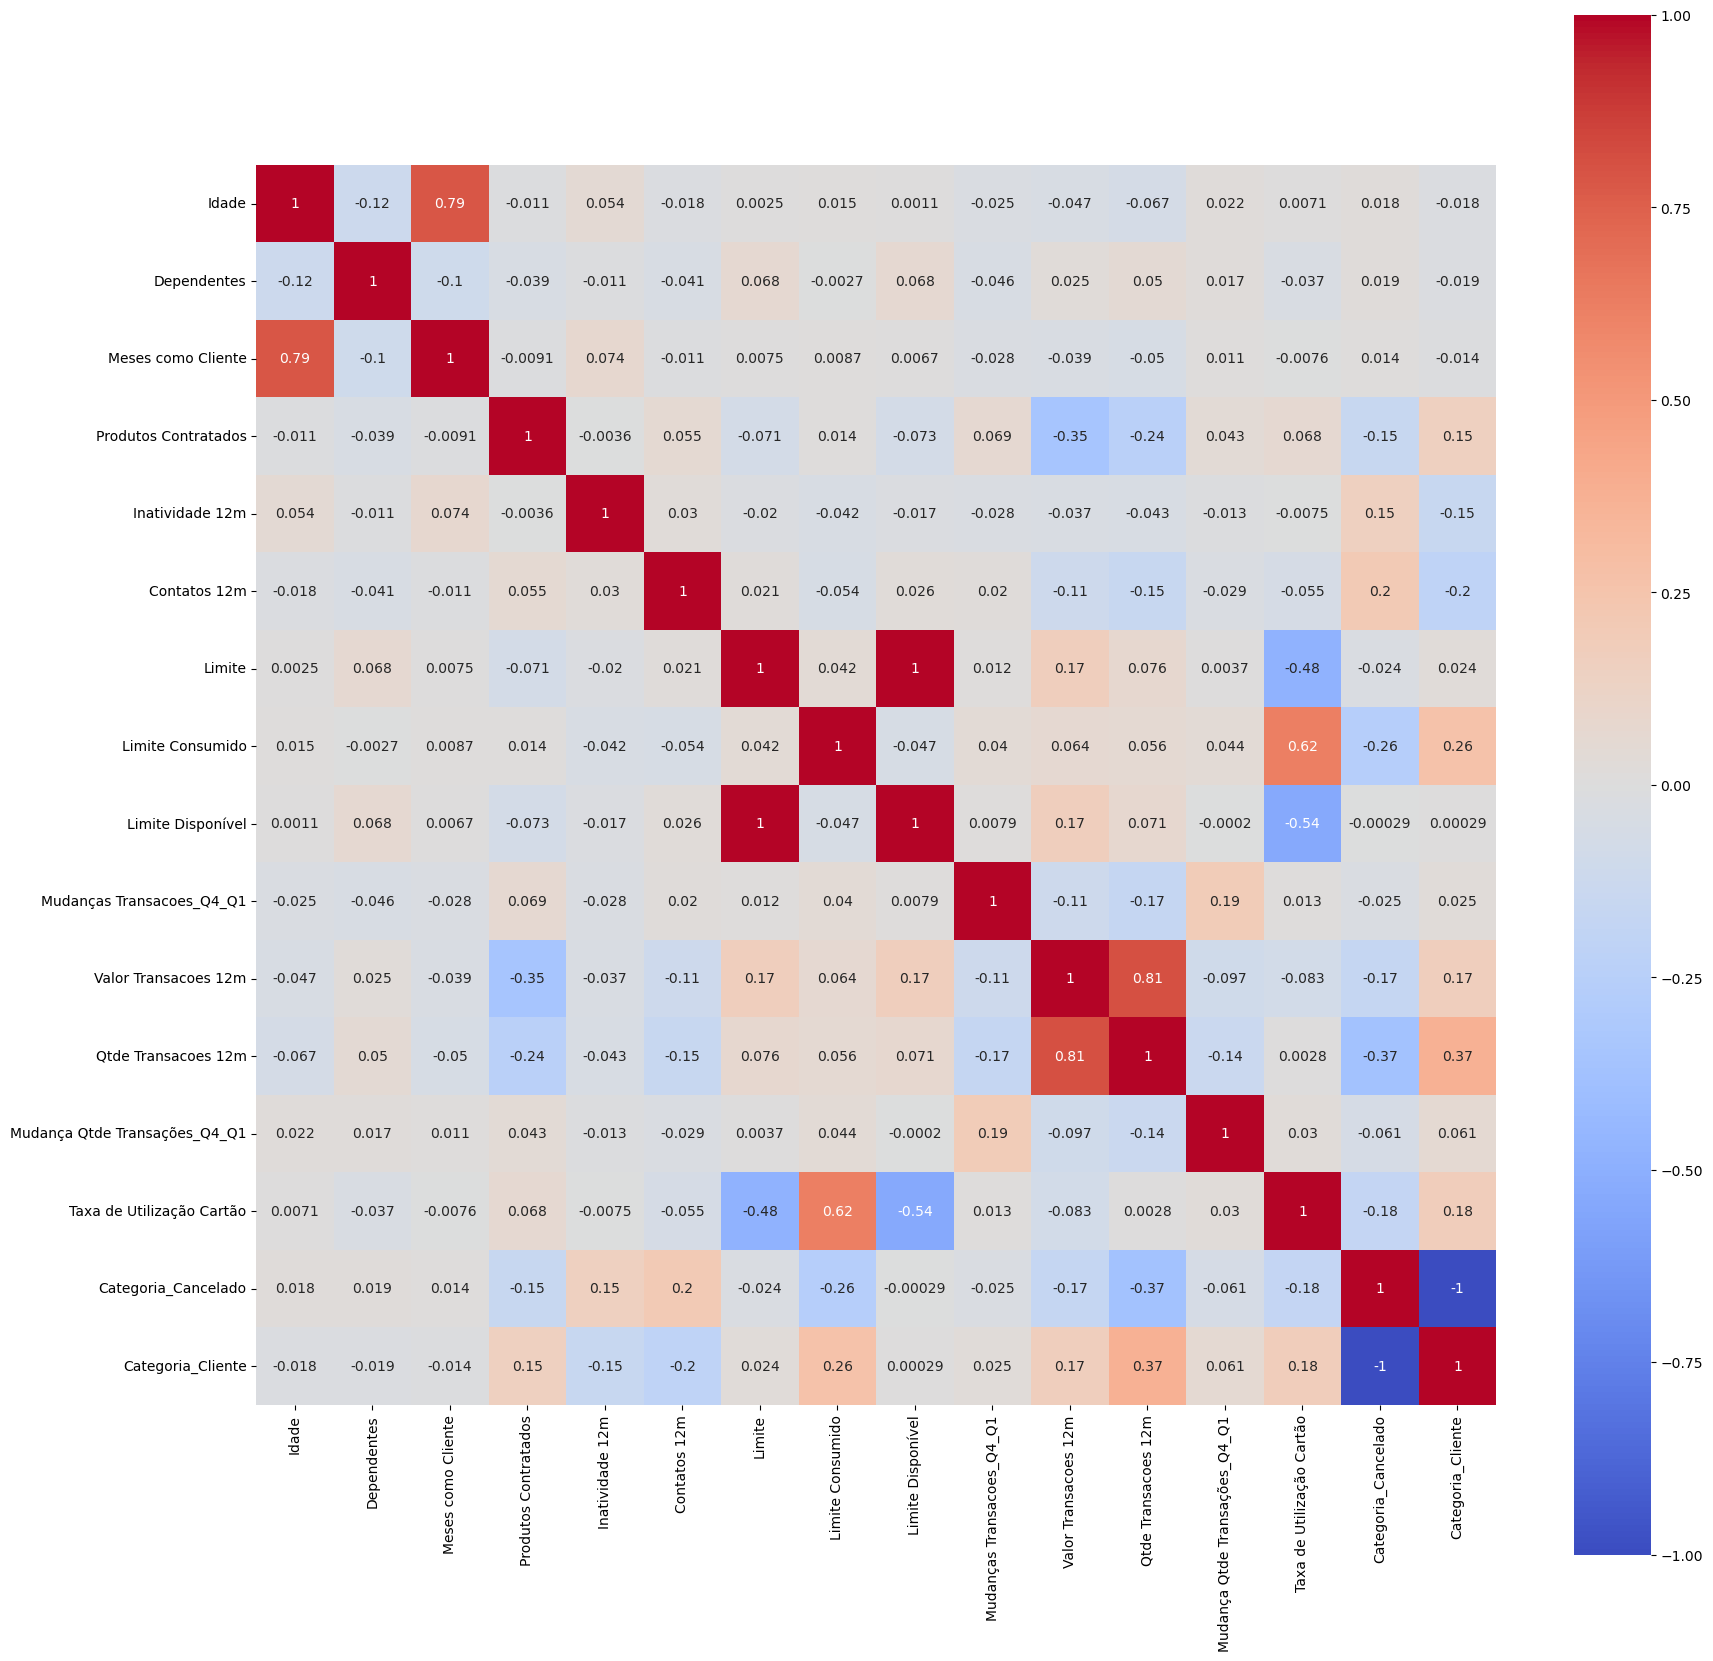

In [32]:
# Compute correlation matrix
corr_matrix = df_dummies.corr()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', ax=ax);

# Conclusions from the exploratory data analysis:

1. **The more products contracted, the lower the cancellation tendency.** The cancellation frequency for those with up to 2 products contracted is almost twice as high as for those with 6 products contracted (Pearson Correlation = -0.15).

2. **Most cancellations are concentrated among clients who spent up to USD 5000 in the last 12 months.** In other words, the higher the transaction amount, the lower the cancellation frequency (Pearson Correlation = -0.37).

3. Most cancellations are concentrated among blue card customers, **with lower income**, with low credit limit;

4. **The higher the usage, the lower the cancellation frequency.**

5. **From two contacts made with customer service, the cancellation frequency increases significantly.** The more contacts made, the higher the cancellation frequency (Pearson Correlation = 0.2).

# Suggestions to reduce the cancellation rate:

1. **Create incentive campaigns for card usage** (such as points programs) since the cancellation rate is lower as customers use the service more frequently.

2. **Implement improvements in the customer contact system** to enhance customer service and satisfaction.

3. **Establish a notification system** after the second customer contact with the service center to take proactive actions in preventing future cancellations.